In [301]:
# import libraries

import pandas as pd
import numpy as np
from statistics import geometric_mean

import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [302]:
# import result sets
df_nocuts = pd.read_csv("df_nocuts.csv")
df_nocuts = df_nocuts.drop(['Unnamed: 0'], axis = 1)
df_cuts = pd.read_csv("df_cuts.csv")
df_cuts = df_cuts.drop(['Unnamed: 0'], axis = 1)

In [303]:
# keep instances that are solved for each of the five random seeds
max_repeat = 5
count_nocuts = df_nocuts['NAME'].value_counts()
count_cuts = df_cuts['NAME'].value_counts()
df_nocuts = df_nocuts[df_nocuts['NAME'].isin(count_nocuts[count_nocuts == max_repeat].index)]
df_cuts = df_cuts[df_cuts['NAME'].isin(count_cuts[count_cuts == max_repeat].index)]

# keep instances that are solved by both cut settings 
df_nocuts_new = df_nocuts.loc[df_nocuts.NAME.isin(df_cuts.NAME)]
df_cuts_new = df_cuts.loc[df_cuts.NAME.isin(df_nocuts.NAME)]

# 
print(df_cuts_new.shape)
print(df_nocuts_new.shape)

df_nocuts_new

(2110, 20)
(2110, 20)


,NAME,INITIAL LP,FIRST ROUND CUT,ROUND OF CUTS,OBJECTIVE VALUE ROOT NODE,BEST SOLUTION,SOLUTION TIME,BEST PRIMAL BOUND,GAP,No. OF CUTS GENERATED,No. OF CUTS APPLIED,No. OF CUTS PRESENT IN LP AT THE END,No. OF NODES,PRESOLVING TIME W/O CUTS,TIME FIRST ROUND,TIME ROOT END,RANDOM SEED,CUT SETTING,STATUS,END
0,10teams.mps.gz,20.0,0,0,917.0,924.0,11.865484,924.0,0.0,210,0,0,276,0.083092,0,0,2,0,optimal,DONE
1,10teams.mps.gz,20.0,0,0,917.0,924.0,12.023708,924.0,0.0,210,0,0,276,0.142738,0,0,32,0,optimal,DONE
2,10teams.mps.gz,20.0,0,0,917.0,924.0,11.812637,924.0,0.0,210,0,0,276,0.085024,0,0,4,0,optimal,DONE
3,10teams.mps.gz,20.0,0,0,917.0,924.0,11.836083,924.0,0.0,210,0,0,276,0.084062,0,0,8,0,optimal,DONE
4,10teams.mps.gz,20.0,0,0,917.0,924.0,11.912657,924.0,0.0,210,0,0,276,0.156648,0,0,16,0,optimal,DONE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2125,wachplan.mps.gz,-24.0,0,0,-9.0,-8.0,1517.447237,-8.0,0.0,1236,0,0,98056,0.755146,0,0,4,0,optimal,DONE
2126,wachplan.mps.gz,-24.0,0,0,-9.0,-8.0,2121.061356,-8.0,0.0,1236,0,0,98056,1.223909,0,0,2,0,optimal,DONE
2127,wachplan.mps.gz,-24.0,0,0,-9.0,-8.0,1518.448849,-8.0,0.0,1236,0,0,98056,0.766641,0,0,8,0,optimal,DONE
2128,wachplan.mps.gz,-24.0,0,0,-9.0,-8.0,2131.242504,-8.0,0.0,1236,0,0,98056,1.187851,0,0,16,0,optimal,DONE


In [304]:
# check if total instances in both settings are same
total_instances = 0
if len(df_cuts_new) == len(df_nocuts_new):
    total_instances += len(df_cuts_new)

print('Total instances:', total_instances)

# General Statistics
solved_cuts = df_cuts_new[(df_cuts_new["SOLUTION TIME"] < 18000)]
solved_nocuts = df_nocuts_new[(df_nocuts_new["SOLUTION TIME"] < 18000)]

unsolved_cuts = df_cuts_new[(df_cuts_new["SOLUTION TIME"] >= 18000)]
unsolved_nocuts = df_nocuts_new[(df_nocuts_new["SOLUTION TIME"] >= 18000)]


print('Instances Solved Using Cuts:', len(solved_cuts))
print('Instances Solved Using No Cuts:', len(solved_nocuts))

print('Instances Unsolved Using Cuts:', len(unsolved_cuts))
print('Instances Unsolved Using No Cuts:', len(unsolved_nocuts))

print('\n')

print('Percentage of Instances Solved Using Cuts:', (len(solved_cuts) / total_instances)*100)
print('Percentage of Instances Solved Using No Cuts:', (len(solved_nocuts) / total_instances)*100)

print('Percentage of Instances Unsolved Using Cuts:', (len(unsolved_cuts) / total_instances)*100)
print('Percentage of Instances Unsolved Using No Cuts:', (len(unsolved_nocuts) / total_instances)*100)

print('\n')

df_merged = df_cuts_new.merge(df_nocuts_new, on = ['NAME', 'RANDOM SEED'], how = 'left')

solved_both = df_merged[(df_merged['SOLUTION TIME_x'] < 18000) & (df_merged['SOLUTION TIME_y'] < 18000)]
print('Instances Solved for both settings:', len(solved_both))

unsolved_both = df_merged[(df_merged['SOLUTION TIME_x'] >= 18000) & (df_merged['SOLUTION TIME_y'] >= 18000)]
print('Instances Unsolved for both settings:', len(unsolved_both))

solved_cuts = df_merged[(df_merged['SOLUTION TIME_x'] < 18000) & (df_merged['SOLUTION TIME_y'] >= 18000)]
print('Instances Solved for Cuts but not for No Cuts:', len(solved_cuts))

solved_nocuts = df_merged[(df_merged['SOLUTION TIME_x'] >= 18000) & (df_merged['SOLUTION TIME_y'] < 18000)]
print('Instances Solved for No Cuts but not for Cuts:', len(solved_nocuts))

print('\n')

print('Percentage of Instances Solved or Unsolved for both settings:', ((len(solved_both)+len(unsolved_both)) / total_instances)*100)
print('Percentage of Instances Solved by Cuts out of remaining instances:', ((len(solved_cuts) / (total_instances - (len(solved_both) + len(unsolved_both)))) * 100))
print('Percentage of Instances Solved by No Cuts out of remaining instances:', ((len(solved_nocuts) / (total_instances - (len(solved_both) + len(unsolved_both)))) * 100))

print('\n')

# Excluding instances that solve within 10% of the time of either settings
cuts_win = df_merged[(df_merged['SOLUTION TIME_x'] < 0.9 * df_merged['SOLUTION TIME_y'])]
nocuts_win = df_merged[(df_merged['SOLUTION TIME_y'] < 0.9 * df_merged['SOLUTION TIME_x'])]

print('Cuts Outperform No Cuts:', len(cuts_win))
print('No Cuts Outperform Cuts:', len(nocuts_win))
print('Percentage Cuts Outperforms:', (len(cuts_win) / total_instances)*100)
print('Percentage No Cuts Outperforms:', (len(nocuts_win) / total_instances)*100)

Total instances: 2110
Instances Solved Using Cuts: 1970
Instances Solved Using No Cuts: 1826
Instances Unsolved Using Cuts: 140
Instances Unsolved Using No Cuts: 284


Percentage of Instances Solved Using Cuts: 93.36492890995261
Percentage of Instances Solved Using No Cuts: 86.54028436018957
Percentage of Instances Unsolved Using Cuts: 6.6350710900473935
Percentage of Instances Unsolved Using No Cuts: 13.459715639810426


Instances Solved for both settings: 1754
Instances Unsolved for both settings: 68
Instances Solved for Cuts but not for No Cuts: 216
Instances Solved for No Cuts but not for Cuts: 72


Percentage of Instances Solved or Unsolved for both settings: 86.35071090047394
Percentage of Instances Solved by Cuts out of remaining instances: 75.0
Percentage of Instances Solved by No Cuts out of remaining instances: 25.0


Cuts Outperform No Cuts: 986
No Cuts Outperform Cuts: 780
Percentage Cuts Outperforms: 46.72985781990521
Percentage No Cuts Outperforms: 36.96682464454976


In [305]:
# Geometric Shifted Mean for Time and Nodes
SHIFT_TIME = 60
SHIFT_NODES = 1000

df = [df_cuts_new, df_nocuts_new]

time = []
nodes = []
for data in df:
    time_ = data['SOLUTION TIME'].tolist()
    timeshift = [i + SHIFT_TIME for i in time_]
    time_geom = geometric_mean(timeshift) - SHIFT_TIME
    time.append(time_geom)
    
    nodes_ = data['No. OF NODES'].tolist()
    nodeshift = [i + SHIFT_NODES for i in nodes_]
    nodes_geom = geometric_mean(nodeshift) - SHIFT_NODES
    nodes.append(nodes_geom)
    
print(time)  
print(nodes)

print('Cuts is faster than No Cuts by (%):', 
      ((time[1] - time[0]) / time[1])*100)
print('Cuts explores fewer nodes than No Cuts by (%):', 
      ((nodes[1] - nodes[0]) / nodes[1])*100)
pd.set_option('display.max_columns', None)

[380.69612464739197, 539.3662463253912]
[4493.8419596268795, 13253.49400401679]
Cuts is faster than No Cuts by (%): 29.417881218743535
Cuts explores fewer nodes than No Cuts by (%): 66.09315280736602


CREATING SETS:

SET 1: All runs of each instance solves before the timeout i.e. solve before 18000s

SET 2: At least one and at most 9 runs of each instance timeout

SET 3: Union of SETS 1 and 2

SET 4: All 10 runs timeout

In [306]:
# Set 1
vc = solved_both['NAME'].value_counts()
analysis_set_1 = solved_both[solved_both['NAME'].isin(vc[vc == max_repeat].index)]

analysis_set_1 = analysis_set_1[['NAME', "RANDOM SEED", "SOLUTION TIME_x", "No. OF NODES_x", "SOLUTION TIME_y", "No. OF NODES_y", 
                                 "GAP_x", "GAP_y"]]
analysis_set_1.rename(columns={'SOLUTION TIME_x': 'TIME W/ CUTS', 'No. OF NODES_x': 'NODES W/ CUTS', 
                               'SOLUTION TIME_y': 'TIME W/O CUTS', 'No. OF NODES_y': 'NODES W/O CUTS', "GAP_x":"GAP W/ CUTS", 
                               "GAP_y":"GAP W/O CUTS"
                              }, inplace=True)
analysis_set_1['Minimum Time'] = analysis_set_1[['TIME W/O CUTS', 'TIME W/ CUTS']].min(axis = 1)
analysis_set_1['Minimum Nodes'] = analysis_set_1[['NODES W/O CUTS', 'NODES W/ CUTS']].min(axis = 1)

analysis_set_1
#analysis_set_1.to_csv('analysis_set_1.csv')

,NAME,RANDOM SEED,TIME W/ CUTS,NODES W/ CUTS,TIME W/O CUTS,NODES W/O CUTS,GAP W/ CUTS,GAP W/O CUTS,Minimum Time,Minimum Nodes
0,10teams.mps.gz,2,10.703114,30,11.865484,276,0.0,0.0,10.703114,30
1,10teams.mps.gz,32,10.543100,30,12.023708,276,0.0,0.0,10.543100,30
2,10teams.mps.gz,4,10.612878,30,11.812637,276,0.0,0.0,10.612878,30
3,10teams.mps.gz,16,10.505375,30,11.912657,276,0.0,0.0,10.505375,30
4,10teams.mps.gz,8,10.696199,30,11.836083,276,0.0,0.0,10.696199,30
...,...,...,...,...,...,...,...,...,...,...
2105,wachplan.mps.gz,16,1644.899683,67520,2131.242504,98056,0.0,0.0,1644.899683,67520
2106,wachplan.mps.gz,4,1228.673581,67520,1517.447237,98056,0.0,0.0,1228.673581,67520
2107,wachplan.mps.gz,2,1670.502304,67520,2121.061356,98056,0.0,0.0,1670.502304,67520
2108,wachplan.mps.gz,8,1221.583196,67520,1518.448849,98056,0.0,0.0,1221.583196,67520


In [307]:
# Splitting the instances into buckets 
df_0 = analysis_set_1[(analysis_set_1['Minimum Time'] >= 0)]
df_10 = analysis_set_1[(analysis_set_1['Minimum Time'] >= 10)]
df_100 = analysis_set_1[(analysis_set_1['Minimum Time'] >= 100)]
df_1000 = analysis_set_1[(analysis_set_1['Minimum Time'] >= 1000)]
df_3600 = analysis_set_1[(analysis_set_1['Minimum Time'] >= 3600)]

In [308]:
df = [df_0, df_10, df_100, df_1000, df_3600]
t_cuts = []
t_nocuts = []
t_perfect = []
n_cuts = []
n_nocuts = []
n_perfect = []
instances = []

for data in df:
    time_nocuts = data['TIME W/O CUTS'].tolist()
    time_cuts = data['TIME W/ CUTS'].tolist()
    time_perfect = data['Minimum Time'].tolist()
    timeshift_nocuts = [i + SHIFT_TIME for i in time_nocuts]
    timeshift_cuts = [i + SHIFT_TIME for i in time_cuts]
    time_shift_perfect = [i + SHIFT_TIME for i in time_perfect]
    time_geom_nocuts = geometric_mean(timeshift_nocuts) - SHIFT_TIME
    time_geom_cuts = geometric_mean(timeshift_cuts) - SHIFT_TIME
    time_geom_perfect = geometric_mean(time_shift_perfect) - SHIFT_TIME
    t_nocuts.append(time_geom_nocuts)
    t_cuts.append(time_geom_cuts)
    t_perfect.append(time_geom_perfect)
    
    nodes_nocuts = data['NODES W/O CUTS'].tolist()
    nodes_cuts = data['NODES W/ CUTS'].tolist()
    nodes_perfect = data['Minimum Nodes'].tolist()
    nodeshift_nocuts = [i + SHIFT_NODES for i in nodes_nocuts]
    nodeshift_cuts = [i + SHIFT_NODES for i in nodes_cuts]
    nodeshift_perfect = [i + SHIFT_NODES for i in nodes_perfect]
    nodes_geom_nocuts = geometric_mean(nodeshift_nocuts) - SHIFT_NODES
    nodes_geom_cuts = geometric_mean(nodeshift_cuts) - SHIFT_NODES
    nodes_geom_perfect = geometric_mean(nodeshift_perfect) - SHIFT_NODES
    n_nocuts.append(nodes_geom_nocuts)
    n_cuts.append(nodes_geom_cuts)
    n_perfect.append(nodes_geom_perfect)
    
    instances.append(len(data))

In [309]:
bb_classes = ['Geometric Mean']
num_bb_classes = len(bb_classes)

bucket_min = [0, 10, 100, 1000, 3600]
bucket_max = [18000, 18000, 18000, 18000, 18000]
num_buckets = len(bucket_min)
assert(len(bucket_max) == num_buckets)
bb_buckets = ['[' + str(bucket_min[j]) + ',' + str(bucket_max[j]) + ')' for j in range(num_buckets)]

bb_metrics = ['Gmean']

In [310]:
avg_bb_cols = pd.MultiIndex.from_product([['Time','Node'],
                                     ['Cut','No Cut', 'Perfect']],
                                    names=['Parameter','Setting'])

bb_row_names = pd.MultiIndex.from_product(
    [bb_classes, bb_buckets],
    names=['Metric', 'Bucket'])

avg_bb_df = pd.DataFrame(
    index = bb_row_names,
    dtype = float)

avg_bb_df = pd.DataFrame(
    columns = avg_bb_cols,
    index = bb_row_names,
    dtype = float)

avg_bb_df['Instances'] = instances

avg_bb_df[('Time', 'Cut')] = t_cuts
avg_bb_df[('Time', 'No Cut')] = t_nocuts
avg_bb_df[('Time', 'Perfect')] = t_perfect
avg_bb_df[('Node', 'Cut')] = n_cuts
avg_bb_df[('Node', 'No Cut')] = n_nocuts
avg_bb_df[('Node', 'Perfect')] = n_perfect


avg_bb_df

Parameter                           Time                            \
Setting                              Cut       No Cut      Perfect   
Metric         Bucket                                                
Geometric Mean [0,18000)      197.911436   244.111142   152.738646   
               [10,18000)     363.011253   427.469016   267.862355   
               [100,18000)    915.360028  1050.218715   671.265974   
               [1000,18000)  3187.868636  3421.699749  2261.073452   
               [3600,18000)  7525.025895  8398.487456  6191.881909   

Parameter                            Node                               \
Setting                               Cut         No Cut       Perfect   
Metric         Bucket                                                    
Geometric Mean [0,18000)      2809.488841    7175.400351   2498.430809   
               [10,18000)     4865.265299   11767.534987   4230.914583   
               [100,18000)    8786.329044   18552.327596   7614.608588   
               [1000,18000)  28761.059398   57929.982512  23228.230323   
               [3600,18000)  78877.405234  111572.453935  62096.120565   

Parameter                   Instances  
Setting                                
Metric         Bucket                  
Geometric Mean [0,18000)         1735  
               [10,18000)        1281  
               [100,18000)        772  
               [1000,18000)       287  
               [3600,18000)        70

In [311]:
# Set 2
set_2 = pd.concat([df_cuts_new, df_nocuts_new])
set_2 = set_2.sort_values(by = ['NAME', 'CUT SETTING'], ascending = True)


counts = set_2['NAME'].value_counts()
res = set_2[~set_2['NAME'].isin(counts[counts < 10].index)]

dic = dict()
for index, row in res.iterrows():
    if row['SOLUTION TIME'] > 18000:
        if row['NAME'] in dic:
            dic[row['NAME']] += 1
        else:
            dic[row["NAME"]] = 1
        if dic[row['NAME']] == 10:
            del dic[row['NAME']]
# dic
set_2_nocuts = df_nocuts_new[df_nocuts_new['NAME'].isin(dic.keys())]
set_2_cuts = df_cuts_new[df_cuts_new['NAME'].isin(dic.keys())]

analysis_set_2 = set_2_cuts.merge(set_2_nocuts, on = ['NAME', 'RANDOM SEED'], how = 'left')
analysis_set_2 = analysis_set_2[['NAME', "RANDOM SEED", "SOLUTION TIME_x", "No. OF NODES_x", "SOLUTION TIME_y", "No. OF NODES_y",
                                "GAP_x", "GAP_y"]]
analysis_set_2.rename(columns={'SOLUTION TIME_x': 'TIME W/ CUTS', 'No. OF NODES_x': 'NODES W/ CUTS', 
                               'SOLUTION TIME_y': 'TIME W/O CUTS', 'No. OF NODES_y': 'NODES W/O CUTS',
                              "GAP_x":"GAP W/ CUTS", "GAP_y":"GAP W/O CUTS"}, inplace=True)
analysis_set_2['Minimum Time'] = analysis_set_2[['TIME W/O CUTS', 'TIME W/ CUTS']].min(axis = 1)
analysis_set_2['Minimum Nodes'] = analysis_set_2[['NODES W/O CUTS', 'NODES W/ CUTS']].min(axis = 1)

In [312]:
factor = 1
time_cuts = []
time_nocuts = []
for index, row in analysis_set_2.iterrows():
    if row['TIME W/ CUTS'] >= 18000:
        time_cuts.append(row['TIME W/ CUTS'] * factor)
    else:
        time_cuts.append(row['TIME W/ CUTS'])
        
    if row['TIME W/O CUTS'] >= 18000:
        time_nocuts.append(row['TIME W/O CUTS'] * factor)
    else:
        time_nocuts.append(row['TIME W/O CUTS'])

analysis_set_2['TIME W/ CUTS'] = time_cuts
analysis_set_2['TIME W/O CUTS'] = time_nocuts

analysis_set_2
# analysis_set_2.to_csv('analysis_set_2.csv')

,NAME,RANDOM SEED,TIME W/ CUTS,NODES W/ CUTS,TIME W/O CUTS,NODES W/O CUTS,GAP W/ CUTS,GAP W/O CUTS,Minimum Time,Minimum Nodes
0,arki001.mps.gz,16,18000.149478,2267610,3341.587091,1761208,0.000010,0.000000,3341.587091,1761208
1,arki001.mps.gz,2,18000.781084,2266276,3491.263686,1761208,0.000011,0.000000,3491.263686,1761208
2,arki001.mps.gz,32,18000.545467,2267605,3338.224716,1761208,0.000010,0.000000,3338.224716,1761208
3,arki001.mps.gz,8,18001.333606,2267611,3339.525724,1761208,0.000010,0.000000,3339.525724,1761208
4,arki001.mps.gz,4,18000.882723,2266269,3339.399161,1761208,0.000011,0.000000,3339.399161,1761208
...,...,...,...,...,...,...,...,...,...,...
320,uct-subprob.mps.gz,8,3248.170770,75300,18000.007822,2052066,0.000000,0.128507,3248.170770,75300
321,uct-subprob.mps.gz,32,3276.896524,75300,18000.007206,2072964,0.000000,0.128358,3276.896524,75300
322,uct-subprob.mps.gz,4,3247.014761,75300,18000.007707,2048846,0.000000,0.128527,3247.014761,75300
323,uct-subprob.mps.gz,16,3263.327597,75300,18000.008022,2021277,0.000000,0.128807,3263.327597,75300


In [313]:
df_0 = analysis_set_2[(analysis_set_2['Minimum Time'] >= 0)]
df_10 = analysis_set_2[(analysis_set_2['Minimum Time'] >= 10)]
df_100 = analysis_set_2[(analysis_set_2['Minimum Time'] >= 100)]
df_1000 = analysis_set_2[(analysis_set_2['Minimum Time'] >= 1000)]
df_3600 = analysis_set_2[(analysis_set_2['Minimum Time'] >= 3600)]

In [314]:
df = [df_0, df_10, df_100, df_1000, df_3600]
t_cuts = []
t_nocuts = []
t_perfect = []
n_cuts = []
n_nocuts = []
n_perfect = []
instances = []

for data in df:
    time_nocuts = data['TIME W/O CUTS'].tolist()
    time_cuts = data['TIME W/ CUTS'].tolist()
    time_perfect = data['Minimum Time'].tolist()
    timeshift_nocuts = [i + SHIFT_TIME for i in time_nocuts]
    timeshift_cuts = [i + SHIFT_TIME for i in time_cuts]
    time_shift_perfect = [i + SHIFT_TIME for i in time_perfect]
    time_geom_nocuts = geometric_mean(timeshift_nocuts) - SHIFT_TIME
    time_geom_cuts = geometric_mean(timeshift_cuts) - SHIFT_TIME
    time_geom_perfect = geometric_mean(time_shift_perfect) - SHIFT_TIME
    t_nocuts.append(time_geom_nocuts)
    t_cuts.append(time_geom_cuts)
    t_perfect.append(time_geom_perfect)
    
    nodes_nocuts = data['NODES W/O CUTS'].tolist()
    nodes_cuts = data['NODES W/ CUTS'].tolist()
    nodes_perfect = data['Minimum Nodes'].tolist()
    nodeshift_nocuts = [i + SHIFT_NODES for i in nodes_nocuts]
    nodeshift_cuts = [i + SHIFT_NODES for i in nodes_cuts]
    nodeshift_perfect = [i + SHIFT_NODES for i in nodes_perfect]
    nodes_geom_nocuts = geometric_mean(nodeshift_nocuts) - SHIFT_NODES
    nodes_geom_cuts = geometric_mean(nodeshift_cuts) - SHIFT_NODES
    nodes_geom_perfect = geometric_mean(nodeshift_perfect) - SHIFT_NODES
    n_nocuts.append(nodes_geom_nocuts)
    n_cuts.append(nodes_geom_cuts)
    n_perfect.append(nodes_geom_perfect)
    
    instances.append(len(data))

In [315]:
avg_bb_df['Instances'] = instances

avg_bb_df[('Time', 'Cut')] = t_cuts
avg_bb_df[('Time', 'No Cut')] = t_nocuts
avg_bb_df[('Time', 'Perfect')] = t_perfect
avg_bb_df[('Node', 'Cut')] = n_cuts
avg_bb_df[('Node', 'No Cut')] = n_nocuts
avg_bb_df[('Node', 'Perfect')] = n_perfect


avg_bb_df

Parameter                            Time                              \
Setting                               Cut        No Cut       Perfect   
Metric         Bucket                                                   
Geometric Mean [0,18000)      4286.529712  13219.465282   3145.080946   
               [10,18000)     4586.665674  13155.818013   3350.126827   
               [100,18000)    5772.303615  12912.105941   4142.041796   
               [1000,18000)   9264.060661  12146.782554   6263.867920   
               [3600,18000)  12366.071116  14965.352513  10295.240773   

Parameter                            Node                               \
Setting                               Cut         No Cut       Perfect   
Metric         Bucket                                                    
Geometric Mean [0,18000)     27262.514666  198481.337184  21914.308544   
               [10,18000)    28776.879745  189464.930994  23063.103677   
               [100,18000)   34623.583516  167942.181455  27424.653099   
               [1000,18000)  52339.616674  137357.142200  39826.005800   
               [3600,18000)  71661.581482  180653.455788  60849.740048   

Parameter                   Instances  
Setting                                
Metric         Bucket                  
Geometric Mean [0,18000)          325  
               [10,18000)         320  
               [100,18000)        302  
               [1000,18000)       255  
               [3600,18000)       176

In [316]:
# Set 3
vc = unsolved_both['NAME'].value_counts()
analysis_set_3 = unsolved_both[unsolved_both['NAME'].isin(vc[vc == max_repeat].index)]

analysis_set_3 = analysis_set_3[['NAME', "RANDOM SEED", "SOLUTION TIME_x", "No. OF NODES_x", "SOLUTION TIME_y", "No. OF NODES_y", 
                                 "GAP_x", "GAP_y"]]
analysis_set_3.rename(columns={'SOLUTION TIME_x': 'TIME W/ CUTS', 'No. OF NODES_x': 'NODES W/ CUTS', 
                               'SOLUTION TIME_y': 'TIME W/O CUTS', 'No. OF NODES_y': 'NODES W/O CUTS', "GAP_x":"GAP W/ CUTS", 
                               "GAP_y":"GAP W/O CUTS"
                              }, inplace=True)
analysis_set_3['Minimum Time'] = analysis_set_3[['TIME W/O CUTS', 'TIME W/ CUTS']].min(axis = 1)
analysis_set_3['Minimum Nodes'] = analysis_set_3[['NODES W/O CUTS', 'NODES W/ CUTS']].min(axis = 1)

timed_out = pd.read_csv('timed_out_instances.csv')
timed_out = timed_out.drop(['Unnamed: 0'], axis = 1)
analysis_set_3 = pd.concat([analysis_set_3, timed_out])
analysis_set_3
# analysis_set_3.to_csv('analysis_set_3.csv')

,NAME,RANDOM SEED,TIME W/ CUTS,NODES W/ CUTS,TIME W/O CUTS,NODES W/O CUTS,GAP W/ CUTS,GAP W/O CUTS,Minimum Time,Minimum Nodes
35,CMS750_4.mps.gz,8,18000.191302,1,18000.324686,65053,4.000000e-02,2.400000e-02,18000.191302,1
36,CMS750_4.mps.gz,32,18000.257615,1,18000.323012,65053,4.000000e-02,2.400000e-02,18000.257615,1
37,CMS750_4.mps.gz,2,18000.231004,1,18000.097527,109961,4.000000e-02,2.400000e-02,18000.097527,1
38,CMS750_4.mps.gz,16,18000.202311,1,18000.320911,65053,4.000000e-02,2.400000e-02,18000.202311,1
39,CMS750_4.mps.gz,4,18000.173077,1,18000.004400,111202,4.000000e-02,2.400000e-02,18000.004400,1
...,...,...,...,...,...,...,...,...,...,...
1075,woodlands09.mps.gz,2,18000.108570,1,18000.085760,1,1.000000e+20,1.000000e+20,18000.085760,1
1076,woodlands09.mps.gz,4,18000.138460,1,18000.132740,1,1.000000e+20,1.000000e+20,18000.132740,1
1077,woodlands09.mps.gz,8,18000.123530,1,18000.088870,1,1.000000e+20,1.000000e+20,18000.088870,1
1078,woodlands09.mps.gz,16,18000.265650,1,18000.128380,1,1.000000e+20,1.000000e+20,18000.128380,1


In [317]:
# Set 1,2
analysis_set_4 = pd.concat([analysis_set_1, analysis_set_2])
analysis_set_4 = analysis_set_4.sort_values(by = ['NAME', 'RANDOM SEED'], ascending = True)
analysis_set_4

,NAME,RANDOM SEED,TIME W/ CUTS,NODES W/ CUTS,TIME W/O CUTS,NODES W/O CUTS,GAP W/ CUTS,GAP W/O CUTS,Minimum Time,Minimum Nodes
0,10teams.mps.gz,2,10.703114,30,11.865484,276,0.0,0.0,10.703114,30
2,10teams.mps.gz,4,10.612878,30,11.812637,276,0.0,0.0,10.612878,30
4,10teams.mps.gz,8,10.696199,30,11.836083,276,0.0,0.0,10.696199,30
3,10teams.mps.gz,16,10.505375,30,11.912657,276,0.0,0.0,10.505375,30
1,10teams.mps.gz,32,10.543100,30,12.023708,276,0.0,0.0,10.543100,30
...,...,...,...,...,...,...,...,...,...,...
2107,wachplan.mps.gz,2,1670.502304,67520,2121.061356,98056,0.0,0.0,1670.502304,67520
2106,wachplan.mps.gz,4,1228.673581,67520,1517.447237,98056,0.0,0.0,1228.673581,67520
2108,wachplan.mps.gz,8,1221.583196,67520,1518.448849,98056,0.0,0.0,1221.583196,67520
2105,wachplan.mps.gz,16,1644.899683,67520,2131.242504,98056,0.0,0.0,1644.899683,67520


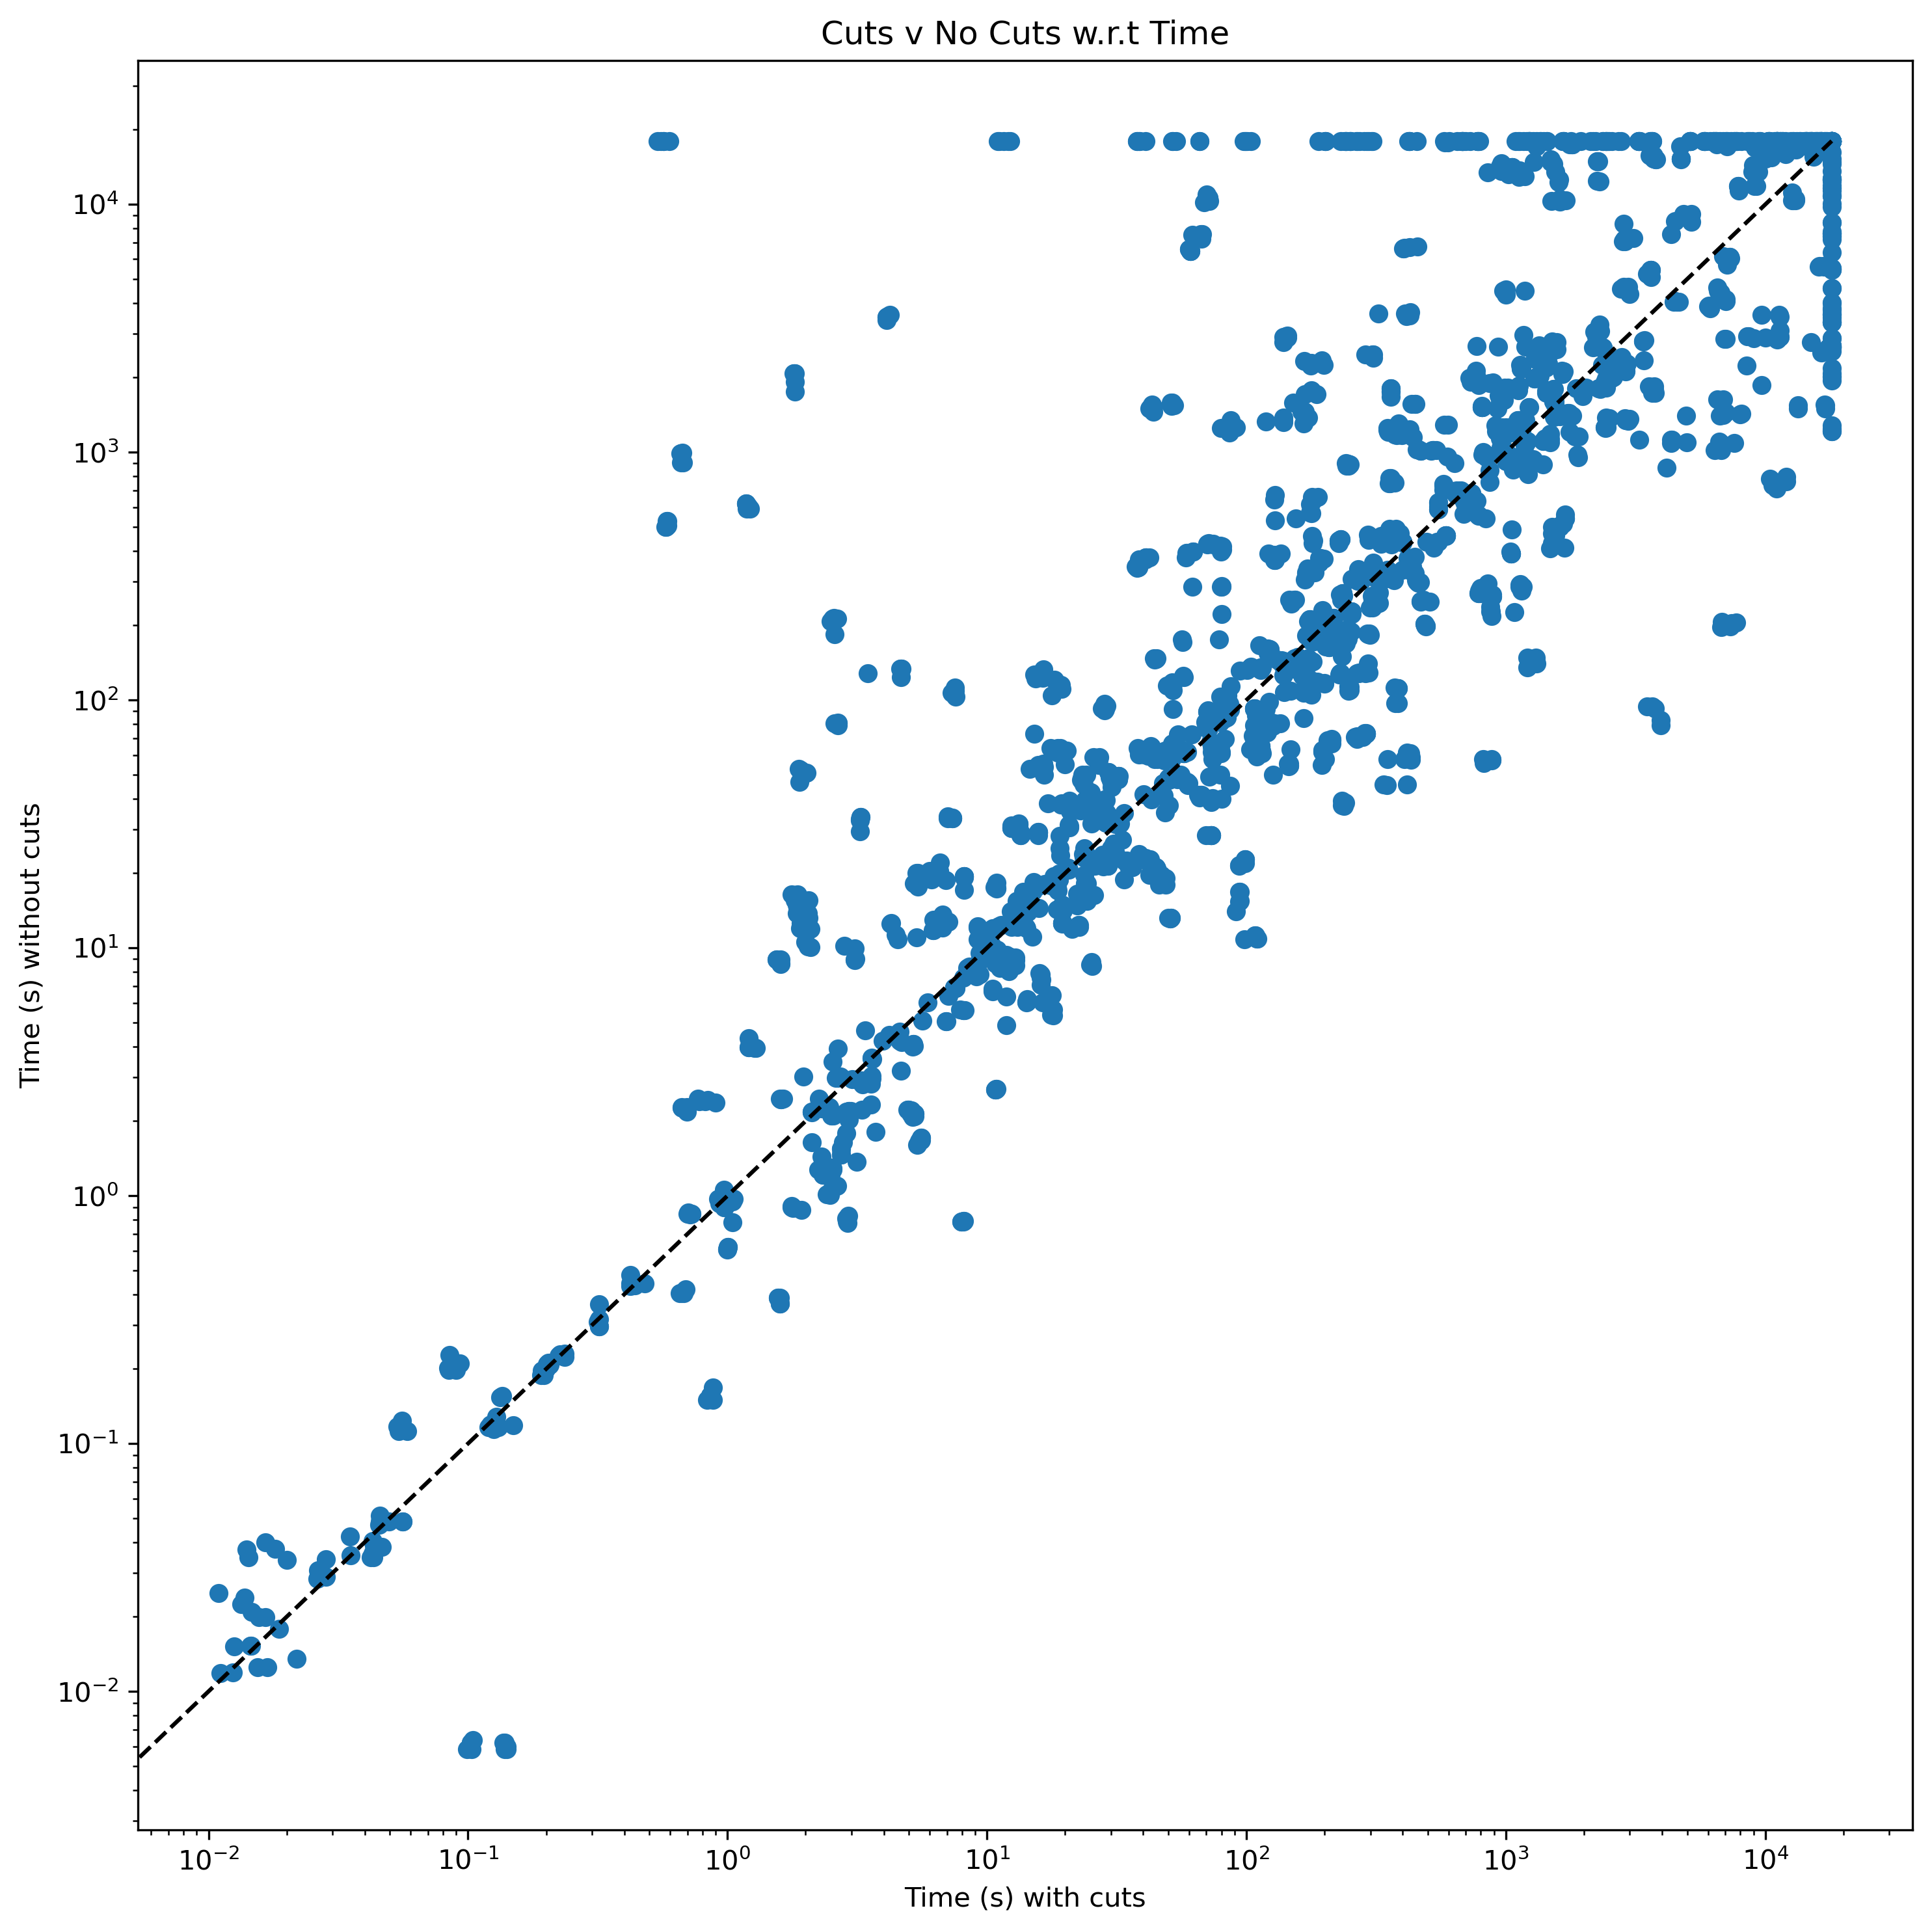

<Figure size 432x288 with 0 Axes>

In [318]:
# Plot for set 4 i.e., set1,2 in the thesis
minx = 0
maxx = 18000

plt.figure(figsize=(10, 10), dpi=300)
plt.scatter(x=analysis_set_4['TIME W/ CUTS'], y=analysis_set_4['TIME W/O CUTS'])
# plt.scatter(x=hard['TIME W/ CUTS'], y=hard['TIME W/O CUTS'])
# plt.legend(["easy" , "hard"], bbox_to_anchor = (1 , 1))

plt.plot(range(int(minx),int(maxx)),range(int(minx),int(maxx)),'--', color='black')

plt.title('Cuts v No Cuts w.r.t Time')
plt.xlabel('Time (s) with cuts')
plt.ylabel('Time (s) without cuts')



fig = plt.gcf()

ax_list=fig.axes
ax=ax_list[0]
ax.set_xscale("log")
ax.set_yscale("log")
plt.tight_layout()
plt.show()
plt.draw()
# fname = "set1,2"
# fig.savefig(fname, dpi=300)

In [319]:
df_0 = analysis_set_4[(analysis_set_4['Minimum Time'] >= 0)]
df_10 = analysis_set_4[(analysis_set_4['Minimum Time'] >= 10)]
df_100 = analysis_set_4[(analysis_set_4['Minimum Time'] >= 100)]
df_1000 = analysis_set_4[(analysis_set_4['Minimum Time'] >= 1000)]
df_3600 = analysis_set_4[(analysis_set_4['Minimum Time'] >= 3600)]

In [320]:
df = [df_0, df_10, df_100, df_1000, df_3600]
t_cuts = []
t_nocuts = []
t_perfect = []
n_cuts = []
n_nocuts = []
n_perfect = []
instances = []

for data in df:
    time_nocuts = data['TIME W/O CUTS'].tolist()
    time_cuts = data['TIME W/ CUTS'].tolist()
    time_perfect = data['Minimum Time'].tolist()
    timeshift_nocuts = [i + SHIFT_TIME for i in time_nocuts]
    timeshift_cuts = [i + SHIFT_TIME for i in time_cuts]
    time_shift_perfect = [i + SHIFT_TIME for i in time_perfect]
    time_geom_nocuts = geometric_mean(timeshift_nocuts) - SHIFT_TIME
    time_geom_cuts = geometric_mean(timeshift_cuts) - SHIFT_TIME
    time_geom_perfect = geometric_mean(time_shift_perfect) - SHIFT_TIME
    t_nocuts.append(time_geom_nocuts)
    t_cuts.append(time_geom_cuts)
    t_perfect.append(time_geom_perfect)
    
    nodes_nocuts = data['NODES W/O CUTS'].tolist()
    nodes_cuts = data['NODES W/ CUTS'].tolist()
    nodes_perfect = data['Minimum Nodes'].tolist()
    nodeshift_nocuts = [i + SHIFT_NODES for i in nodes_nocuts]
    nodeshift_cuts = [i + SHIFT_NODES for i in nodes_cuts]
    nodeshift_perfect = [i + SHIFT_NODES for i in nodes_perfect]
    nodes_geom_nocuts = geometric_mean(nodeshift_nocuts) - SHIFT_NODES
    nodes_geom_cuts = geometric_mean(nodeshift_cuts) - SHIFT_NODES
    nodes_geom_perfect = geometric_mean(nodeshift_perfect) - SHIFT_NODES
    n_nocuts.append(nodes_geom_nocuts)
    n_cuts.append(nodes_geom_cuts)
    n_perfect.append(nodes_geom_perfect)
    
    instances.append(len(data))

In [321]:
avg_bb_df['Instances'] = instances

avg_bb_df[('Time', 'Cut')] = t_cuts
avg_bb_df[('Time', 'No Cut')] = t_nocuts
avg_bb_df[('Time', 'Perfect')] = t_perfect
avg_bb_df[('Node', 'Cut')] = n_cuts
avg_bb_df[('Node', 'No Cut')] = n_nocuts
avg_bb_df[('Node', 'Perfect')] = n_perfect


avg_bb_df

Parameter                            Time                             \
Setting                               Cut        No Cut      Perfect   
Metric         Bucket                                                  
Geometric Mean [0,18000)       342.716067    491.815107   266.358359   
               [10,18000)      622.935682    882.751847   463.576679   
               [100,18000)    1552.722509   2156.202613  1135.661393   
               [1000,18000)   5274.347229   6222.222493  3659.510876   
               [3600,18000)  10737.726323  12699.088227  8910.168599   

Parameter                            Node                               \
Setting                               Cut         No Cut       Perfect   
Metric         Bucket                                                    
Geometric Mean [0,18000)      4226.106721   12532.993879   3705.957347   
               [10,18000)     7115.547469   20913.009559   6096.588712   
               [100,18000)   13073.481257   34854.670532  11050.973952   
               [1000,18000)  38162.341597   87049.480793  29969.881647   
               [3600,18000)  73645.804616  157529.577371  61201.873569   

Parameter                   Instances  
Setting                                
Metric         Bucket                  
Geometric Mean [0,18000)         2060  
               [10,18000)        1601  
               [100,18000)       1074  
               [1000,18000)       542  
               [3600,18000)       246

In [322]:
# CREATING DATA SET WITH ALL FEATURES FOR SET 4

analysis_ml = analysis_set_4 
analysis_ml = analysis_ml.filter(['NAME', 'RANDOM SEED', 'TIME W/ CUTS', 'TIME W/O CUTS', 'NODES W/ CUTS', 'NODES W/O CUTS'])
df_nocuts_ml = df_nocuts_new.filter(['NAME', 'RANDOM SEED', 'PRESOLVING TIME W/O CUTS'], axis = 1)

analysis_ml = analysis_ml.merge(df_nocuts_ml, on = ['NAME', 'RANDOM SEED'], how = 'left')

df_cuts_ml = df_cuts_new.filter(['NAME', 'RANDOM SEED', 'PRESOLVING TIME W/ CUTS', 'TIME FIRST ROUND', 'TIME ROOT END',
                                'INITIAL LP', 'FIRST ROUND CUT', 'ROUND OF CUTS', 'OBJECTIVE VALUE ROOT NODE' ], axis = 1)
analysis_ml = analysis_ml.merge(df_cuts_ml, on = ['NAME', 'RANDOM SEED'], how = 'left')
                        
analysis_ml

,NAME,RANDOM SEED,TIME W/ CUTS,TIME W/O CUTS,NODES W/ CUTS,NODES W/O CUTS,PRESOLVING TIME W/O CUTS,PRESOLVING TIME W/ CUTS,TIME FIRST ROUND,TIME ROOT END,INITIAL LP,FIRST ROUND CUT,ROUND OF CUTS,OBJECTIVE VALUE ROOT NODE
0,10teams.mps.gz,2,10.703114,11.865484,30,276,0.083092,0.156992,1.558014,3.545730,20.0,917.0,13,924.0
1,10teams.mps.gz,4,10.612878,11.812637,30,276,0.085024,0.088616,1.490672,3.482125,20.0,917.0,13,924.0
2,10teams.mps.gz,8,10.696199,11.836083,30,276,0.084062,0.143698,1.548765,3.544250,20.0,917.0,13,924.0
3,10teams.mps.gz,16,10.505375,11.912657,30,276,0.156648,0.084967,1.485573,3.461656,20.0,917.0,13,924.0
4,10teams.mps.gz,32,10.543100,12.023708,30,276,0.142738,0.087368,1.490006,3.467127,20.0,917.0,13,924.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2055,wachplan.mps.gz,2,1670.502304,2121.061356,67520,98056,1.223909,1.224360,3.573959,132.251918,-24.0,-9.0,12,-9.0
2056,wachplan.mps.gz,4,1228.673581,1517.447237,67520,98056,0.755146,0.799768,2.524237,96.536777,-24.0,-9.0,12,-9.0
2057,wachplan.mps.gz,8,1221.583196,1518.448849,67520,98056,0.766641,0.806567,2.523101,96.622791,-24.0,-9.0,12,-9.0
2058,wachplan.mps.gz,16,1644.899683,2131.242504,67520,98056,1.187851,1.262998,3.592139,130.866673,-24.0,-9.0,12,-9.0


In [323]:
static = pd.read_csv("features_original.csv")
static = static.filter(['instance_name', 'vars', 'bin_vars', 'int_vars', 'cont_vars', 
                       'constr', 'linsetpart_constr', 'linsetpack_constr', 'linsetcov_constr', 'lincard_constr',
                       'lineqknap_constr', 'linbinpack_constr', 'linknaps_constr', 'linintknap_constr',
                        'linmixbin_constr', 'nonzeroes', 'obj_dyn', 'dynamism_mean'], axis = 1)
static['instance_name'] = static.instance_name.str.split('/').str[-1]

static_new = static.loc[static.instance_name.isin(analysis_set_4.NAME)]

static_new['nonzeroes'] = static_new['nonzeroes'] / (static_new['vars'] * static_new['constr'] )

static_new['bin_vars'] = static_new['bin_vars'] / static_new['vars']
static_new['int_vars'] = static_new['int_vars'] / static_new['vars']
static_new['cont_vars'] = static_new['cont_vars'] / static_new['vars']

static_new['linbinpack_constr'] = static_new['linbinpack_constr'] / static_new['constr']
static_new['lincard_constr'] = static_new['lincard_constr'] / static_new['constr']
static_new['lineqknap_constr'] = static_new['lineqknap_constr'] / static_new['constr']
static_new['linintknap_constr'] = static_new['linintknap_constr'] / static_new['constr']
static_new['linknaps_constr'] = static_new['linknaps_constr'] / static_new['constr']
static_new['linmixbin_constr'] = static_new['linmixbin_constr'] / static_new['constr']
static_new['linsetcov_constr'] = static_new['linsetcov_constr'] / static_new['constr']
static_new['linsetpack_constr'] = static_new['linsetpack_constr'] / static_new['constr']
static_new['linsetpart_constr'] = static_new['linsetpart_constr'] / static_new['constr']

static_new['vars'] = np.log(static_new['vars'])
static_new['constr'] = np.log(static_new['constr'])

static_new.rename(columns={'instance_name': 'NAME'}, inplace=True)

static_new

<ipython-input-323-6cac96f6dcd9>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  static_new['nonzeroes'] = static_new['nonzeroes'] / (static_new['vars'] * static_new['constr'] )
<ipython-input-323-6cac96f6dcd9>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  static_new['bin_vars'] = static_new['bin_vars'] / static_new['vars']
<ipython-input-323-6cac96f6dcd9>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

,NAME,vars,bin_vars,int_vars,cont_vars,constr,linsetpart_constr,linsetpack_constr,linsetcov_constr,lincard_constr,lineqknap_constr,linbinpack_constr,linknaps_constr,linintknap_constr,linmixbin_constr,nonzeroes,obj_dyn,dynamism_mean
27,drayage-25-27.mps.gz,9.313799,0.994139,0.0,0.005861,8.440312,0.045356,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.912527,0.000809,1.946700,4.357370
36,drayage-25-32.mps.gz,9.313799,0.994139,0.0,0.005861,8.440312,0.045356,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.912527,0.000809,1.965990,4.357370
66,drayage-100-12.mps.gz,9.313799,0.994139,0.0,0.005861,8.440312,0.045356,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.912527,0.000809,1.920630,4.357390
67,drayage-25-23.mps.gz,9.313799,0.994139,0.0,0.005861,8.440312,0.045356,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.912527,0.000809,1.884700,4.357380
159,drayage-100-23.mps.gz,9.313799,0.994139,0.0,0.005861,8.440312,0.045356,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.912527,0.000809,1.884700,4.357380
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5618,istanbul-no-cutoff.mps.gz,8.572060,0.005680,0.0,0.994320,9.920640,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000049,0.0,0.992628,0.000665,1.257010,0.255187
5619,30_70_45_095_100.mps.gz,9.303466,0.999909,0.0,0.000091,9.435562,0.000000,0.000000,0.001437,0.0,0.0,0.0,0.000000,0.0,0.164139,0.000339,3.789020,0.000000
5631,eil33-2.mps.gz,8.415382,1.000000,0.0,0.000000,3.465736,1.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.306155,0.778142,0.000000
5709,map10.mps.gz,12.010952,0.000887,0.0,0.999113,12.703260,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000003,0.0,0.027666,0.000010,0.000000,0.000003


In [324]:
# Presolve Features

presol = pd.read_csv("features_after_trivial_presolving.csv")
presol = presol.filter(['instance_name', 'vars', 'int_vars', 'constr'], axis = 1)

presol['instance_name'] = presol.instance_name.str.split('/').str[-1]

presol_new = presol.loc[presol.instance_name.isin(analysis_set_4.NAME)]

presol_new['int_vars'] = presol_new['int_vars'] / presol_new['vars']

presol_new['vars'] = np.log(presol_new['vars'])
presol_new['constr'] = np.log(presol_new['constr'])

presol_new.rename(columns={'instance_name': 'NAME', 'vars': 'presol_vars', 'int_vars': 'presol_int_vars', 
                            'constr': 'presol_constr'}, inplace=True)

<ipython-input-324-1320095e8e16>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  presol_new['int_vars'] = presol_new['int_vars'] / presol_new['vars']
<ipython-input-324-1320095e8e16>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  presol_new['vars'] = np.log(presol_new['vars'])
<ipython-input-324-1320095e8e16>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https

In [325]:
ml_1 = analysis_ml.merge(static_new, on = "NAME", how = "left")
ml_2 = ml_1.merge(presol_new, on = "NAME", how = "left")
ml_2

,NAME,RANDOM SEED,TIME W/ CUTS,TIME W/O CUTS,NODES W/ CUTS,NODES W/O CUTS,PRESOLVING TIME W/O CUTS,PRESOLVING TIME W/ CUTS,TIME FIRST ROUND,TIME ROOT END,INITIAL LP,FIRST ROUND CUT,ROUND OF CUTS,OBJECTIVE VALUE ROOT NODE,vars,bin_vars,int_vars,cont_vars,constr,linsetpart_constr,linsetpack_constr,linsetcov_constr,lincard_constr,lineqknap_constr,linbinpack_constr,linknaps_constr,linintknap_constr,linmixbin_constr,nonzeroes,obj_dyn,dynamism_mean,presol_vars,presol_int_vars,presol_constr
0,10teams.mps.gz,2,10.703114,11.865484,30,276,0.083092,0.156992,1.558014,3.545730,20.0,917.0,13,924.0,7.613325,0.888889,0.000000,0.111111,5.438079,0.347826,0.173913,0.0,0.000000,0.0,0.0,0.0,0.0,0.478261,0.026087,1.63347,0.0,7.377759,0.000000,5.347108
1,10teams.mps.gz,4,10.612878,11.812637,30,276,0.085024,0.088616,1.490672,3.482125,20.0,917.0,13,924.0,7.613325,0.888889,0.000000,0.111111,5.438079,0.347826,0.173913,0.0,0.000000,0.0,0.0,0.0,0.0,0.478261,0.026087,1.63347,0.0,7.377759,0.000000,5.347108
2,10teams.mps.gz,8,10.696199,11.836083,30,276,0.084062,0.143698,1.548765,3.544250,20.0,917.0,13,924.0,7.613325,0.888889,0.000000,0.111111,5.438079,0.347826,0.173913,0.0,0.000000,0.0,0.0,0.0,0.0,0.478261,0.026087,1.63347,0.0,7.377759,0.000000,5.347108
3,10teams.mps.gz,16,10.505375,11.912657,30,276,0.156648,0.084967,1.485573,3.461656,20.0,917.0,13,924.0,7.613325,0.888889,0.000000,0.111111,5.438079,0.347826,0.173913,0.0,0.000000,0.0,0.0,0.0,0.0,0.478261,0.026087,1.63347,0.0,7.377759,0.000000,5.347108
4,10teams.mps.gz,32,10.543100,12.023708,30,276,0.142738,0.087368,1.490006,3.467127,20.0,917.0,13,924.0,7.613325,0.888889,0.000000,0.111111,5.438079,0.347826,0.173913,0.0,0.000000,0.0,0.0,0.0,0.0,0.478261,0.026087,1.63347,0.0,7.377759,0.000000,5.347108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2055,wachplan.mps.gz,2,1670.502304,2121.061356,67520,98056,1.223909,1.224360,3.573959,132.251918,-24.0,-9.0,12,-9.0,8.119994,0.999702,0.000298,0.000000,7.347944,0.000000,0.000000,0.0,0.144237,0.0,0.0,0.0,0.0,0.018030,0.017120,0.00000,0.0,7.741534,0.000434,6.582025
2056,wachplan.mps.gz,4,1228.673581,1517.447237,67520,98056,0.755146,0.799768,2.524237,96.536777,-24.0,-9.0,12,-9.0,8.119994,0.999702,0.000298,0.000000,7.347944,0.000000,0.000000,0.0,0.144237,0.0,0.0,0.0,0.0,0.018030,0.017120,0.00000,0.0,7.741534,0.000434,6.582025
2057,wachplan.mps.gz,8,1221.583196,1518.448849,67520,98056,0.766641,0.806567,2.523101,96.622791,-24.0,-9.0,12,-9.0,8.119994,0.999702,0.000298,0.000000,7.347944,0.000000,0.000000,0.0,0.144237,0.0,0.0,0.0,0.0,0.018030,0.017120,0.00000,0.0,7.741534,0.000434,6.582025
2058,wachplan.mps.gz,16,1644.899683,2131.242504,67520,98056,1.187851,1.262998,3.592139,130.866673,-24.0,-9.0,12,-9.0,8.119994,0.999702,0.000298,0.000000,7.347944,0.000000,0.000000,0.0,0.144237,0.0,0.0,0.0,0.0,0.018030,0.017120,0.00000,0.0,7.741534,0.000434,6.582025


In [326]:
# ml_2.to_csv('ml.csv')

STATISTICS FOR EVALUATION METRICS TABLE

SET 1

In [327]:
# Time and nodes
# new_1 =  analysis_set_1.groupby('NAME').mean()
# new_1.mean()

#gmean w/ cuts time
array = analysis_set_1['TIME W/ CUTS'].tolist()
shift = [i + 60 for i in array]
geom = stats.gmean(shift) - 60
geom

197.91143550499544

In [328]:
#gmean w/o cuts time
array = analysis_set_1['TIME W/O CUTS'].tolist()
shift = [i + 60 for i in array]
geom = stats.gmean(shift) - 60
geom

244.11114185678542

In [329]:
#gmean perfect time
array = analysis_set_1['Minimum Time'].tolist()
shift = [i + 60 for i in array]
geom = stats.gmean(shift) - 60
geom

152.73864641494518

In [330]:
#gmean w/ cuts nodes
array = analysis_set_1['NODES W/ CUTS'].tolist()
shift = [i + 1000 for i in array]
geom = stats.gmean(shift) - 1000
geom

2809.4888406034647

In [331]:
#gmean w/o cuts nodes
array = analysis_set_1['NODES W/O CUTS'].tolist()
shift = [i + 1000 for i in array]
geom = stats.gmean(shift) - 1000
geom

7175.400350701547

In [332]:
#gmean perfect nodes
array = analysis_set_1['Minimum Nodes'].tolist()
shift = [i + 1000 for i in array]
geom = stats.gmean(shift) - 1000
geom

2498.4308089219735

In [333]:
#Variability
new_1 = analysis_set_1.groupby('NAME').std()
new_1.mean()

RANDOM SEED       12.198361
TIME W/ CUTS      54.600351
NODES W/ CUTS      0.000000
TIME W/O CUTS     57.738546
NODES W/O CUTS     0.000000
GAP W/ CUTS        0.000000
GAP W/O CUTS       0.000000
Minimum Time      36.736717
Minimum Nodes      0.000000
dtype: float64

In [334]:
# rs solved
w_cut_list = []
w_nocut_list = []

for index, row in analysis_set_1.iterrows():
    if row['TIME W/ CUTS'] < 18000:
        w_cut_list.append(1)
    else:
        w_cut_list.append(0)
    
    if row['TIME W/O CUTS'] < 18000:
        w_nocut_list.append(1)
    else:
        w_nocut_list.append(0)

analysis_set_1['RS solved w cuts'] = w_cut_list
analysis_set_1['RS solved w/o cuts'] = w_nocut_list

In [335]:
# wins
wins_cut = []
wins_nocut = []
tie = []

for index, row in analysis_set_1.iterrows():
    if row['TIME W/ CUTS'] < 0.9*row['TIME W/O CUTS']:
        wins_cut.append(1)
    else:
        wins_cut.append(0)
    
    if row['TIME W/O CUTS'] < 0.9*row['TIME W/ CUTS']:
        wins_nocut.append(1)
    else:
        wins_nocut.append(0)

analysis_set_1['w cuts'] = wins_cut
analysis_set_1['w no cuts'] = wins_nocut

In [336]:
# rs solved values
new_1_1 = analysis_set_1.groupby('NAME').sum()
new_1_1.mean()

RANDOM SEED           6.200000e+01
TIME W/ CUTS          4.832457e+03
NODES W/ CUTS         6.220676e+05
TIME W/O CUTS         6.239008e+03
NODES W/O CUTS        2.040594e+06
GAP W/ CUTS           0.000000e+00
GAP W/O CUTS          0.000000e+00
Minimum Time          3.060693e+03
Minimum Nodes         5.215325e+05
RS solved w cuts      5.000000e+00
RS solved w/o cuts    5.000000e+00
w cuts                2.219020e+00
w no cuts             2.028818e+00
dtype: float64

In [337]:
# wins values
new_1_2 = new_1_1.sum()
new_1_2

RANDOM SEED           2.151400e+04
TIME W/ CUTS          1.676863e+06
NODES W/ CUTS         2.158574e+08
TIME W/O CUTS         2.164936e+06
NODES W/O CUTS        7.080860e+08
GAP W/ CUTS           0.000000e+00
GAP W/O CUTS          0.000000e+00
Minimum Time          1.062060e+06
Minimum Nodes         1.809718e+08
RS solved w cuts      1.735000e+03
RS solved w/o cuts    1.735000e+03
w cuts                7.700000e+02
w no cuts             7.040000e+02
dtype: float64

SET 2

In [338]:
# Time and nodes
new_2 =  analysis_set_2.groupby('NAME').mean()
new_2.mean()

#gmean w/ cuts time
array = analysis_set_2['TIME W/ CUTS'].tolist()
shift = [i + 60 for i in array]
geom = stats.gmean(shift) - 60
geom

4286.5297123811015

In [339]:
#gmean w/o cuts time
array = analysis_set_2['TIME W/O CUTS'].tolist()
shift = [i + 60 for i in array]
geom = stats.gmean(shift) - 60
geom

13219.465281701403

In [340]:
#gmean perfect time
array = analysis_set_2['Minimum Time'].tolist()
shift = [i + 60 for i in array]
geom = stats.gmean(shift) - 60
geom

3145.080945657266

In [341]:
#gmean w/ cuts nodes
array = analysis_set_2['NODES W/ CUTS'].tolist()
shift = [i + 1000 for i in array]
geom = stats.gmean(shift) - 1000
geom

27262.51466597482

In [342]:
#gmean w/o cuts nodes
array = analysis_set_2['NODES W/O CUTS'].tolist()
shift = [i + 1000 for i in array]
geom = stats.gmean(shift) - 1000
geom

198481.3371836066

In [343]:
#gmean perfect nodes
array = analysis_set_2['Minimum Nodes'].tolist()
shift = [i + 1000 for i in array]
geom = stats.gmean(shift) - 1000
geom

21914.308544455227

In [344]:
#Variability
new_2 = analysis_set_2.groupby('NAME').std()
new_2.mean()

RANDOM SEED          12.198361
TIME W/ CUTS        213.999217
NODES W/ CUTS     10555.158826
TIME W/O CUTS       149.103364
NODES W/O CUTS    77749.592166
GAP W/ CUTS          25.157733
GAP W/O CUTS          0.185637
Minimum Time        303.112148
Minimum Nodes     19459.053225
dtype: float64

In [345]:
# rs solved
w_cut_list = []
w_nocut_list = []

for index, row in analysis_set_2.iterrows():
    if row['TIME W/ CUTS'] < 18000:
        w_cut_list.append(1)
    else:
        w_cut_list.append(0)
    
    if row['TIME W/O CUTS'] < 18000:
        w_nocut_list.append(1)
    else:
        w_nocut_list.append(0)

analysis_set_2['RS solved w cuts'] = w_cut_list
analysis_set_2['RS solved w/o cuts'] = w_nocut_list

In [346]:
# wins
wins_cut = []
wins_nocut = []
tie = []

for index, row in analysis_set_2.iterrows():
    if row['TIME W/ CUTS'] < 0.9*row['TIME W/O CUTS']:
        wins_cut.append(1)
    else:
        wins_cut.append(0)
    
    if row['TIME W/O CUTS'] < 0.9*row['TIME W/ CUTS']:
        wins_nocut.append(1)
    else:
        wins_nocut.append(0)

analysis_set_2['w cuts'] = wins_cut
analysis_set_2['w no cuts'] = wins_nocut

In [347]:
# rs solved values
new_2_1 = analysis_set_2.groupby('NAME').sum()
new_2_1.mean()

RANDOM SEED           6.200000e+01
TIME W/ CUTS          4.734437e+04
NODES W/ CUTS         3.357782e+06
TIME W/O CUTS         7.599271e+04
NODES W/O CUTS        1.034413e+07
GAP W/ CUTS           3.076923e+19
GAP W/O CUTS          3.076923e+19
Minimum Time          3.358066e+04
Minimum Nodes         2.712082e+06
RS solved w cuts      3.615385e+00
RS solved w/o cuts    1.400000e+00
w cuts                3.323077e+00
w no cuts             1.169231e+00
dtype: float64

In [348]:
# wins values
new_2_2 = new_2_1.sum()
new_2_2

RANDOM SEED           4.030000e+03
TIME W/ CUTS          3.077384e+06
NODES W/ CUTS         2.182558e+08
TIME W/O CUTS         4.939526e+06
NODES W/O CUTS        6.723682e+08
GAP W/ CUTS           2.000000e+21
GAP W/O CUTS          2.000000e+21
Minimum Time          2.182743e+06
Minimum Nodes         1.762853e+08
RS solved w cuts      2.350000e+02
RS solved w/o cuts    9.100000e+01
w cuts                2.160000e+02
w no cuts             7.600000e+01
dtype: float64

In [349]:
# Geom Mean for gap with cuts
new_2_4 = analysis_set_2[analysis_set_2['GAP W/ CUTS'] < 1e+20]
print('Number of data points with infinity gap:', len(analysis_set_2)-len(new_2_4))
array = new_2_4['GAP W/ CUTS'].tolist()
shift = [i + 10 for i in array]
geom = stats.gmean(shift) - 10
geom

Number of data points with infinity gap: 20


1.0872223380545538

In [350]:
# Geom Mean for gap without cuts
new_2_4 = analysis_set_2[analysis_set_2['GAP W/O CUTS'] < 1e+20]
print('Number of data points with infinity gap:', len(analysis_set_2)-len(new_2_4))
array = new_2_4['GAP W/O CUTS'].tolist()
shift = [i + 10 for i in array]
geom = stats.gmean(shift) - 10
geom

Number of data points with infinity gap: 20


1.1261623089442914

SET 3

In [351]:
# Time and nodes
# new_3 =  analysis_set_3.groupby('NAME').mean()
# new_3.mean()

#gmean w/ cuts time
array = analysis_set_3['TIME W/ CUTS'].tolist()
shift = [i + 60 for i in array]
geom = stats.gmean(shift) - 60
geom

18000.484062711625

In [352]:
#gmean w/o cuts time
array = analysis_set_3['TIME W/O CUTS'].tolist()
shift = [i + 60 for i in array]
geom = stats.gmean(shift) - 60
geom

18000.187519842246

In [353]:
#gmean perfect time
array = analysis_set_3['Minimum Time'].tolist()
shift = [i + 60 for i in array]
geom = stats.gmean(shift) - 60
geom

18000.0763936348

In [354]:
#gmean w/ cuts nodes
array = analysis_set_3['NODES W/ CUTS'].tolist()
shift = [i + 1000 for i in array]
geom = stats.gmean(shift) - 1000
geom

21793.633557227284

In [355]:
#gmean w/o cuts nodes
array = analysis_set_3['NODES W/O CUTS'].tolist()
shift = [i + 1000 for i in array]
geom = stats.gmean(shift) - 1000
geom

39539.55117886498

In [356]:
#gmean perfect nodes
array = analysis_set_3['Minimum Nodes'].tolist()
shift = [i + 1000 for i in array]
geom = stats.gmean(shift) - 1000
geom

19454.398285480067

In [357]:
#Variability
new_3 = analysis_set_3.groupby('NAME').std()
new_3.mean()

RANDOM SEED       1.219836e+01
TIME W/ CUTS      7.479529e-01
NODES W/ CUTS     8.358170e+04
TIME W/O CUTS     1.935480e-01
NODES W/O CUTS    1.471012e+05
GAP W/ CUTS       4.402372e+17
GAP W/O CUTS      1.978821e+17
Minimum Time      8.955322e-02
Minimum Nodes     7.982869e+04
dtype: float64

In [358]:
# rs solved
w_cut_list = []
w_nocut_list = []

for index, row in analysis_set_3.iterrows():
    if row['TIME W/ CUTS'] < 18000:
        w_cut_list.append(1)
    else:
        w_cut_list.append(0)
    
    if row['TIME W/O CUTS'] < 18000:
        w_nocut_list.append(1)
    else:
        w_nocut_list.append(0)

analysis_set_3['RS solved w cuts'] = w_cut_list
analysis_set_3['RS solved w/o cuts'] = w_nocut_list

In [359]:
# wins
wins_cut = []
wins_nocut = []
tie = []

for index, row in analysis_set_3.iterrows():
    if row['TIME W/ CUTS'] < 0.9*row['TIME W/O CUTS']:
        wins_cut.append(1)
    else:
        wins_cut.append(0)
    
    if row['TIME W/O CUTS'] < 0.9*row['TIME W/ CUTS']:
        wins_nocut.append(1)
    else:
        wins_nocut.append(0)

analysis_set_3['w cuts'] = wins_cut
analysis_set_3['w no cuts'] = wins_nocut

In [360]:
# rs solved values
new_3_1 = analysis_set_3.groupby('NAME').sum()
new_3_1.mean()

RANDOM SEED           6.200000e+01
TIME W/ CUTS          9.000243e+04
NODES W/ CUTS         9.848479e+06
TIME W/O CUTS         9.000094e+04
NODES W/O CUTS        1.754216e+07
GAP W/ CUTS           1.278761e+20
GAP W/O CUTS          1.256637e+20
Minimum Time          9.000038e+04
Minimum Nodes         9.505160e+06
RS solved w cuts      0.000000e+00
RS solved w/o cuts    0.000000e+00
w cuts                0.000000e+00
w no cuts             0.000000e+00
dtype: float64

In [361]:
# wins values
new_3_2 = new_3_1.sum()
new_3_2

RANDOM SEED           1.401200e+04
TIME W/ CUTS          2.034055e+07
NODES W/ CUTS         2.225756e+09
TIME W/O CUTS         2.034021e+07
NODES W/O CUTS        3.964528e+09
GAP W/ CUTS           2.890000e+22
GAP W/O CUTS          2.840000e+22
Minimum Time          2.034009e+07
Minimum Nodes         2.148166e+09
RS solved w cuts      0.000000e+00
RS solved w/o cuts    0.000000e+00
w cuts                0.000000e+00
w no cuts             0.000000e+00
dtype: float64

In [362]:
# Geom Mean for gap with cuts
new_3_4 = analysis_set_3[analysis_set_3['GAP W/ CUTS'] < 1e+20]
print('Number of data points with infinity gap:', len(analysis_set_3)-len(new_3_4))
array = new_3_4['GAP W/ CUTS'].tolist()
shift = [i + 10 for i in array]
geom = stats.gmean(shift) - 10
geom

Number of data points with infinity gap: 289


3.3181592744190755

In [363]:
# Geom Mean for gap with out cuts
new_3_4 = analysis_set_3[analysis_set_3['GAP W/O CUTS'] < 1e+20]
print('Number of data points with infinity gap:', len(analysis_set_3)-len(new_3_4))
array = new_3_4['GAP W/O CUTS'].tolist()
shift = [i + 10 for i in array]
geom = stats.gmean(shift) - 10
geom

Number of data points with infinity gap: 284


3.7381150087967114

SET 4

In [364]:
# Time and nodes
# new_4 =  analysis_set_4.groupby('NAME').mean()
# new_4.mean()

#gmean w/ cuts time
array = analysis_set_4['TIME W/ CUTS'].tolist()
shift = [i + 60 for i in array]
geom = stats.gmean(shift) - 60
geom

342.71606692258734

In [365]:
#gmean w/o cuts time
array = analysis_set_4['TIME W/O CUTS'].tolist()
shift = [i + 60 for i in array]
geom = stats.gmean(shift) - 60
geom

491.8151068731819

In [366]:
#gmean perfect time
array = analysis_set_4['Minimum Time'].tolist()
shift = [i + 60 for i in array]
geom = stats.gmean(shift) - 60
geom

266.35835875352836

In [367]:
#gmean w/ cuts nodes
array = analysis_set_4['NODES W/ CUTS'].tolist()
shift = [i + 1000 for i in array]
geom = stats.gmean(shift) - 1000
geom

4226.106720895241

In [368]:
#gmean w/ cuts nodes
array = analysis_set_4['NODES W/O CUTS'].tolist()
shift = [i + 1000 for i in array]
geom = stats.gmean(shift) - 1000
geom

12532.993878759415

In [369]:
#gmean perfect nodes
array = analysis_set_4['Minimum Nodes'].tolist()
shift = [i + 1000 for i in array]
geom = stats.gmean(shift) - 1000
geom

3705.95734653602

In [370]:
#Variability
new_4 = analysis_set_4.groupby('NAME').std()
new_4.mean()

RANDOM SEED          12.198361
TIME W/ CUTS         79.748230
NODES W/ CUTS      1665.255640
TIME W/O CUTS        72.152899
NODES W/O CUTS    12266.319152
GAP W/ CUTS           3.969060
GAP W/O CUTS          0.029287
Minimum Time         78.761967
Minimum Nodes      3069.996261
dtype: float64

In [371]:
# rs solved
w_cut_list = []
w_nocut_list = []

for index, row in analysis_set_4.iterrows():
    if row['TIME W/ CUTS'] < 18000:
        w_cut_list.append(1)
    else:
        w_cut_list.append(0)
    
    if row['TIME W/O CUTS'] < 18000:
        w_nocut_list.append(1)
    else:
        w_nocut_list.append(0)

analysis_set_4['RS solved w cuts'] = w_cut_list
analysis_set_4['RS solved w/o cuts'] = w_nocut_list

In [372]:
# wins
wins_cut = []
wins_nocut = []
tie = []

for index, row in analysis_set_4.iterrows():
    if row['TIME W/ CUTS'] < 0.9*row['TIME W/O CUTS']:
        wins_cut.append(1)
    else:
        wins_cut.append(0)
    
    if row['TIME W/O CUTS'] < 0.9*row['TIME W/ CUTS']:
        wins_nocut.append(1)
    else:
        wins_nocut.append(0)

analysis_set_4['w cuts'] = wins_cut
analysis_set_4['w no cuts'] = wins_nocut

In [373]:
# rs solved values
new_4_1 = analysis_set_4.groupby('NAME').sum()
new_4_1.mean()

RANDOM SEED           6.200000e+01
TIME W/ CUTS          1.153943e+04
NODES W/ CUTS         1.053673e+06
TIME W/O CUTS         1.724384e+04
NODES W/O CUTS        3.350617e+06
GAP W/ CUTS           4.854369e+18
GAP W/O CUTS          4.854369e+18
Minimum Time          7.875736e+03
Minimum Nodes         8.671289e+05
RS solved w cuts      4.781553e+00
RS solved w/o cuts    4.432039e+00
w cuts                2.393204e+00
w no cuts             1.893204e+00
dtype: float64

In [374]:
# wins values
new_4_2 = new_4_1.sum()
new_4_2

RANDOM SEED           2.554400e+04
TIME W/ CUTS          4.754246e+06
NODES W/ CUTS         4.341133e+08
TIME W/O CUTS         7.104462e+06
NODES W/O CUTS        1.380454e+09
GAP W/ CUTS           2.000000e+21
GAP W/O CUTS          2.000000e+21
Minimum Time          3.244803e+06
Minimum Nodes         3.572571e+08
RS solved w cuts      1.970000e+03
RS solved w/o cuts    1.826000e+03
w cuts                9.860000e+02
w no cuts             7.800000e+02
dtype: float64

In [375]:
# Geom Mean for gap with cuts
# new_4_4 = analysis_set_4[analysis_set_4['GAP W/ CUTS'] < 1e+20]
# print('Number of data points with infinity gap:', len(analysis_set_4)-len(new_4_4))
# stats.gmean(new_4_4.iloc[:,6])

new_4_4 = analysis_set_4[analysis_set_4['GAP W/ CUTS'] < 1e+20]
print('Number of data points with infinity gap:', len(analysis_set_4)-len(new_4_4))
array = new_4_4['GAP W/ CUTS'].tolist()
shift = [i + 10 for i in array]
geom = stats.gmean(shift) - 10
geom

Number of data points with infinity gap: 20


0.15550306507906875

In [376]:
# Geom Mean for gap with out cuts
new_4_4 = analysis_set_4[analysis_set_4['GAP W/O CUTS'] < 1e+20]
print('Number of data points with infinity gap:', len(analysis_set_4)-len(new_4_4))
array = new_4_4['GAP W/O CUTS'].tolist()
shift = [i + 10 for i in array]
geom = stats.gmean(shift) - 10
geom

Number of data points with infinity gap: 20


0.1608277788704715